# Algorithmic Trading

In [2]:
import yfinance as yf
import pandas as pd
import datetime as df
import matplotlib.pyplot as plt

## Gathering Data

In [3]:
stocks = ["AMZN", "MSFT", "GOOG", "META", "NFLX", "AAPL"]
start = df.datetime.today() - df.timedelta(3650)
end = df.datetime.today()

In [4]:
cl_price = pd.DataFrame()
# ohlcv_data = {}

for ticker in stocks:
    cl_price[ticker] = yf.download(ticker, start, end)['Adj Close']
    # ohlcv_data[ticker] = yf.download((ticker, start, end))
cl_price.fillna(method='bfill', axis=0, inplace=True)
cl_price.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AMZN,MSFT,GOOG,META,NFLX,AAPL
Date,,,,,,
2022-09-02,127.510002,256.059998,108.680000,160.320007,226.110001,155.809998
2022-09-06,126.110001,253.250000,107.480003,158.539993,218.389999,154.529999
2022-09-07,129.479996,258.089996,110.480003,160.389999,228.960007,155.960007
2022-09-08,129.820007,258.519989,109.419998,162.059998,227.440002,154.460007
2022-09-09,133.270004,264.459991,111.779999,169.149994,233.570007,157.369995


## Do A little stats

In [5]:
cl_price.describe()

,AMZN,MSFT,GOOG,META,NFLX,AAPL
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,71.108727,111.114757,56.958943,152.810100,231.500029,56.910172
std,53.991029,89.789181,35.213717,86.656768,178.338898,47.494971
min,11.030000,21.805252,16.119081,18.980000,7.685714,12.084599
25%,19.677875,40.400290,28.766771,80.035000,67.881788,23.265815
50%,49.796000,69.754902,48.256500,151.220001,179.095001,37.021852
75%,100.638874,164.119446,68.039373,194.735001,361.977509,73.233238
max,186.570496,340.882812,150.709000,382.179993,691.690002,181.259933


In [6]:
daily_return = cl_price.pct_change()
# cl_price/cl_price.shift(1) - 1
daily_return.head()

,AMZN,MSFT,GOOG,META,NFLX,AAPL
Date,,,,,,
2012-09-17,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-18,0.002907,-0.000961,0.011690,0.016264,-0.016836,0.003043
2012-09-19,0.011324,-0.004169,0.012836,0.064929,0.017481,0.000271
2012-09-20,-0.003325,0.012883,0.000852,-0.030056,0.029804,-0.004842
2012-09-21,-0.012806,-0.008267,0.008062,0.011952,-0.016173,0.001989


In [7]:
print(f'Mean:\n{daily_return.mean()}\n')
print(f'Standard Deviation:\n{daily_return.std()}')

Mean:
AMZN    0.001131
MSFT    0.001069
GOOG    0.000873
META    0.001104
NFLX    0.001793
AAPL    0.000959
dtype: float64

Standard Deviation:
AMZN    0.020058
MSFT    0.016643
GOOG    0.016659
META    0.023814
NFLX    0.030300
AAPL    0.018142
dtype: float64


In [8]:
daily_return.rolling(window=10).mean()

,AMZN,MSFT,GOOG,META,NFLX,AAPL
Date,,,,,,
2012-09-17,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-18,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-19,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-20,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-21,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2022-09-02,-0.007833,-0.010957,-0.008078,-0.004306,-0.006016,-0.009458
2022-09-06,-0.005307,-0.009119,-0.006601,-0.002493,-0.003368,-0.007976
2022-09-07,-0.002935,-0.006736,-0.003549,-0.000136,0.002350,-0.006848


In [9]:
daily_return.ewm(com=10, min_periods=10).mean()

,AMZN,MSFT,GOOG,META,NFLX,AAPL
Date,,,,,,
2012-09-17,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-18,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-19,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-20,NaN,NaN,NaN,NaN,NaN,NaN
2012-09-21,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2022-09-02,-0.003254,-0.005812,-0.004587,-0.002977,-0.000369,-0.004240
2022-09-06,-0.003956,-0.006282,-0.005174,-0.003716,-0.003440,-0.004602
2022-09-07,-0.001167,-0.003973,-0.002166,-0.002317,0.001273,-0.003342


## Data Visualization & Analysis

array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>]],
      dtype=object)

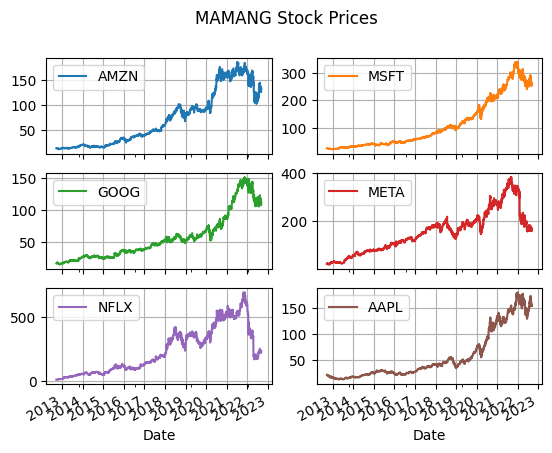

In [10]:
cl_price.plot(subplots=True, layout=(3,2), title="MAMANG Stock Prices", grid=True)

array([[<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>]],
      dtype=object)

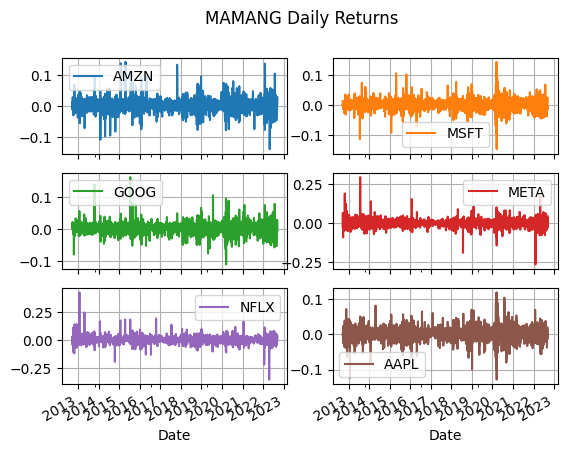

In [11]:
daily_return.plot(subplots=True, layout=(3,2), title="MAMANG Daily Returns", grid=True)

<AxesSubplot:title={'center':'Growth Amount Per Day'}, xlabel='Date'>

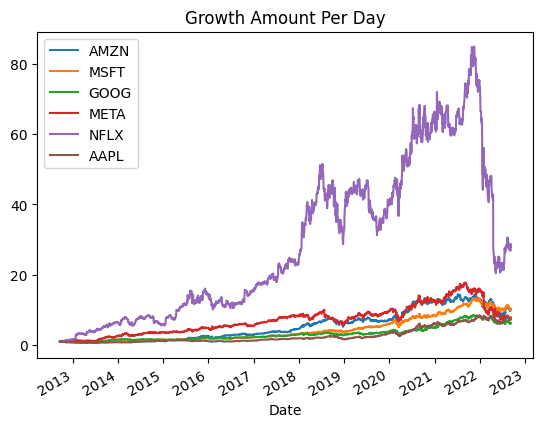

In [14]:
(1+daily_return).cumprod().plot(title="Growth Amount Per Day")

<BarContainer object of 6 artists>

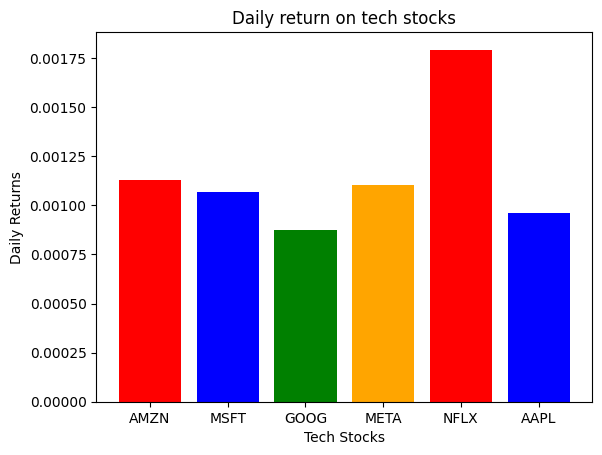

In [13]:
fig, ax = plt.subplots()
plt.style.available
ax.set(title="Daily return on tech stocks", xlabel="Tech Stocks", ylabel = "Daily Returns")
plt.bar(daily_return.columns,daily_return.mean(),color=["red","blue","green","orange"])